In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
from utils import *
from visualize import *
from sklearn.linear_model import *
from sklearn.kernel_ridge import *
from sklearn.pipeline import *
from sklearn.preprocessing import *

DBNAME="taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
#,'20170625','20170626','20170627','20170628'
df=taxis.getdf_loc_dates(DBNAME,['20170624'],LAT,LON)
df.head()

,Point,Time,X,Y,TaxiCount
0,0,0900,24,12,28
1,1,0905,24,12,37
2,2,0910,24,12,34
3,3,0915,24,12,35
4,4,0920,24,12,37


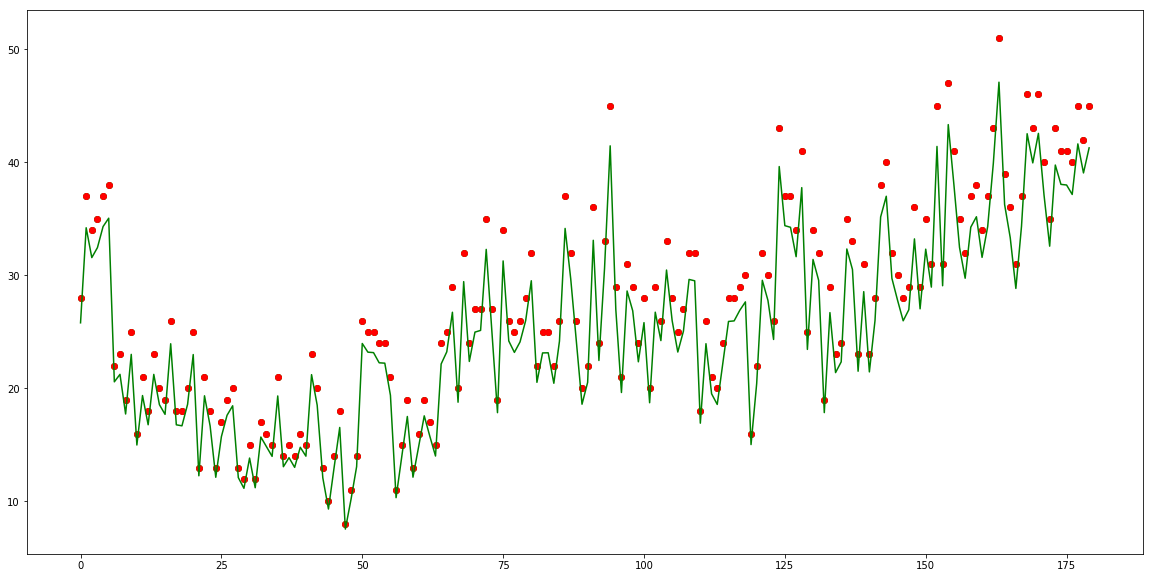

     Point  Time   X   Y  TaxiCount
175    175  2335  24  12         41
176    176  2340  24  12         40
177    177  2345  24  12         45
178    178  2350  24  12         42
179    179  2355  24  12         45
[ 37.98889941  37.15128467  41.62374873  39.05670825  41.27223988]
0.947350238654


In [52]:
model = KernelRidge(alpha=0.1,kernel='rbf',gamma=2)
X=df['Point'].as_matrix()
y=df['TaxiCount'].as_matrix()

X=X.reshape(-1,1)

model.fit(X,y)

plot_model(X,y,model)

print df.tail()

X_predict = np.array([175,176,177,178,179]).reshape(-1,1)

print model.predict(X_predict)

print model.score(X,y)
